In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io,color,transform
import os
from google.colab import drive
drive.mount('/content/drive')
folder_path = "/content/drive/MyDrive/AML/HW3/Q1/360"
%cd {folder_path}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AML/HW3/Q1/360


# Question 1:

### Apply PCA to the images from folder '360 Rocks'. How many components do you need to preserve 95% of the variance? [3 points]

In [ ]:

%cd {folder_path}
# Load images from the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Load the images into a numpy array and convert to grayscale
images = []
for image_file in image_files:
    img = io.imread(os.path.join(folder_path, image_file))
    img_gray = color.rgb2gray(img)  # Convert to grayscale
    images.append(img_gray)

# Convert the list of images to a 2D numpy array (num_images, num_pixels)
images_array = np.array(images)
print(images_array.shape)
# Flatten the array to 1D (num_images, num_pixels)
num_images, height, width = images_array.shape
images_1d = images_array.reshape(num_images, height * width)

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
images_standardized = scaler.fit_transform(images_1d)

/content/drive/MyDrive/AML/HW3/Q1/360
(360, 800, 800)


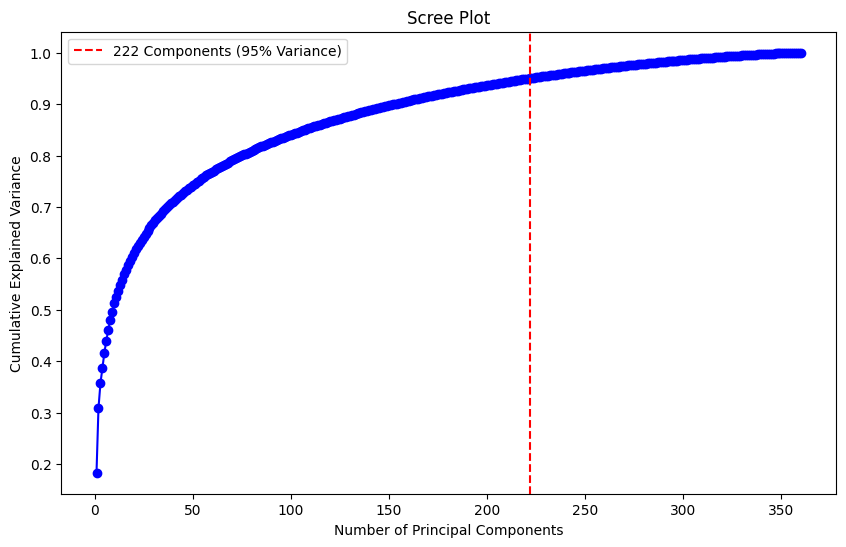




Number of components to preserve 95% variance: 222


In [ ]:
# Apply PCA without specifying the number of components
pca = PCA()
pca.fit(images_standardized)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components to preserve 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'{n_components_95} Components (95% Variance)')
plt.legend()
plt.show()

print("\n\n")
print(f"Number of components to preserve 95% variance: {n_components_95}")


Question 2 : Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept 95% of variance using PCA. [3 points]

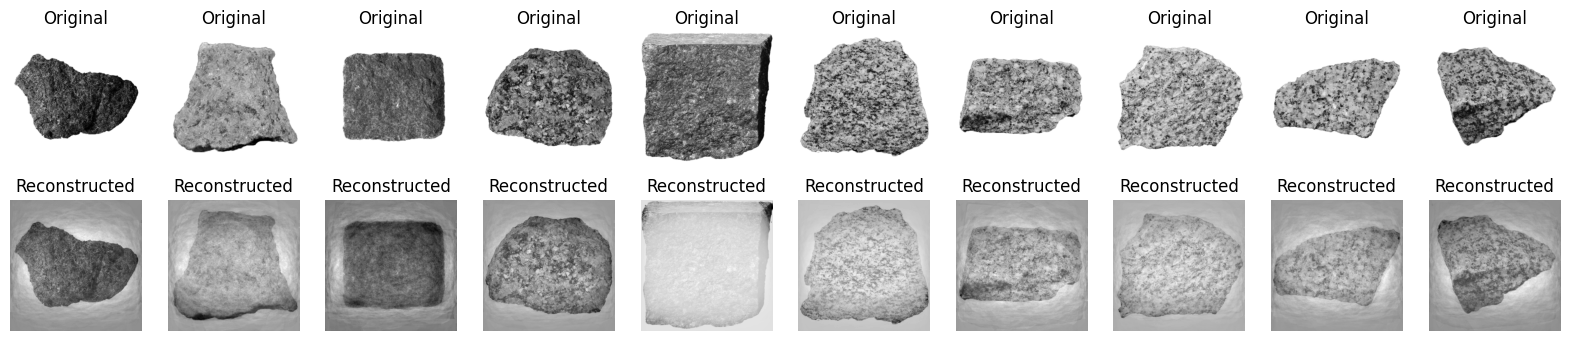

In [ ]:
# Apply PCA with 222 components
n_components = 222
pca = PCA(n_components=n_components)
images_pca = pca.fit_transform(images_standardized)

# Reconstruct the images from the PCA components
images_reconstructed = pca.inverse_transform(images_pca)
images_reconstructed = images_reconstructed.reshape(num_images, height, width)

# Display 10 original and reconstructed images
num_displayed = 10
fig, axes = plt.subplots(2, num_displayed, figsize=(2 * num_displayed, 4))

for i in range(num_displayed):
    axes[0, i].imshow(images[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    axes[1, i].imshow(images_reconstructed[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Reconstructed')

plt.show()

Thanks to PCA, images look a little blurred out, but we are only considering around 222 features instead of the original